In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import xarray as xr
import rioxarray as rxr
import numpy as np
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from shapely.geometry import mapping

In [2]:
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME,'earth-analytics','data'))

In [3]:
landsat_post_fire_path = os.path.join("cold-springs-fire","landsat_collect","LC080340322016072301T1-SC20180214145802","crop")

glob(os.path.join(landsat_post_fire_path, "*"))

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'co

In [4]:
glob(os.path.join(landsat_post_fire_path, "*.tif"))

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'co

In [5]:
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path,"*band[2-5]*.tif"))
all_landsat_post_bands

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif']

In [6]:
all_landsat_post_bands.sort()
all_landsat_post_bands

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif']

In [8]:
def open_clean_band(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    return rxr.open_rasterio(band_path, masked=True).squeeze()

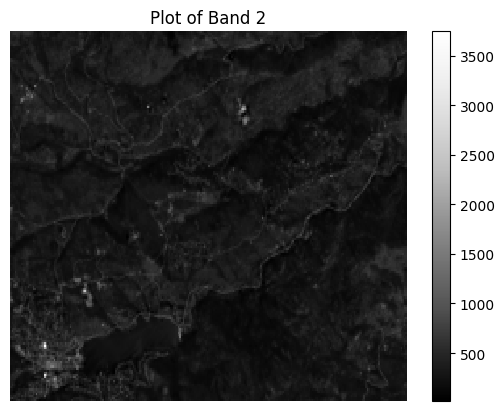

In [9]:
landsat_post_xr = open_clean_band(all_landsat_post_bands[0])

f, ax = plt.subplots()
landsat_post_xr.plot.imshow(cmap="Greys_r",ax=ax)
ax.set_title("Plot of Band 2")
ax.set_axis_off()
plt.show()

In [10]:
fire_boundary_path = os.path.join("cold-springs-fire","vector_layers","fire-boundary-geomac","co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

In [11]:
landsat_crs = es.crs_check(all_landsat_post_bands[0])

print("Landsat crs is:", landsat_crs)
print("Fire boundary crs", fire_boundary.crs)

Landsat crs is: EPSG:32613
Fire boundary crs EPSG:4269


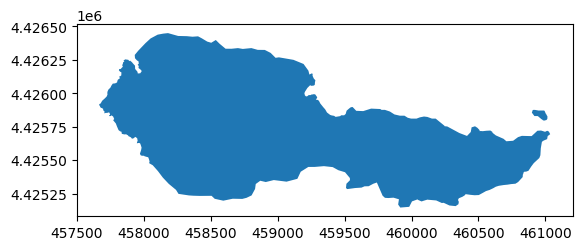

In [12]:
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)
fire_boundary_utmz13.plot()
plt.show()

In [13]:
landsat_post_xr_clip = rxr.open_rasterio(all_landsat_post_bands[0]).rio.clip(fire_boundary_utmz13.geometry,from_disk=True).squeeze()

landsat_post_xr_clip


<xarray.DataArray (y: 44, x: 113)> Size: 10kB
array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)
Coordinates:
  * x            (x) float64 904B 4.577e+05 4.577e+05 ... 4.61e+05 4.61e+05
  * y            (y) float64 352B 4.426e+06 4.426e+06 ... 4.425e+06 4.425e+06
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  3743
    STATISTICS_MEAN:     337.61331587892
    STATISTICS_MINIMUM:  17
    STATISTICS_STDDEV:   139.84903539903
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          -32768

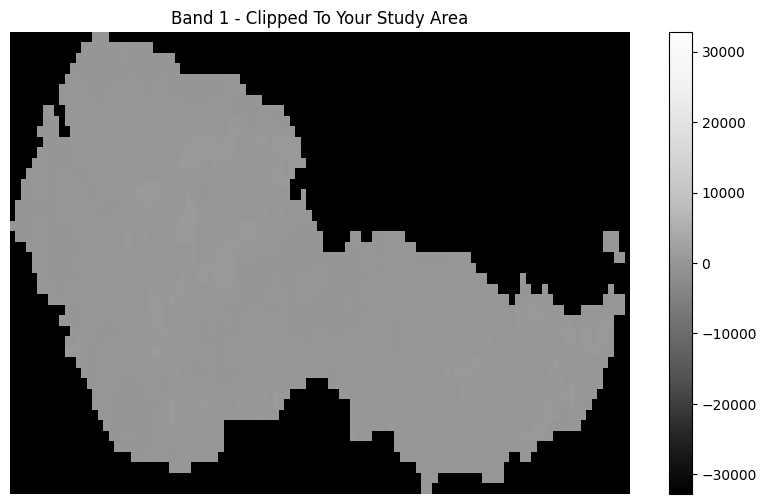

In [14]:
f, ax = plt.subplots(figsize=(10, 6))
landsat_post_xr_clip.plot.imshow(cmap="Greys_r",ax=ax)
ax.set_axis_off()
ax.set_title("Band 1 - Clipped To Your Study Area")
plt.show()

In [16]:
valid_range = (0, 10000)

if valid_range:
    mask = ((landsat_post_xr_clip < valid_range[0]) | (landsat_post_xr_clip > valid_range[1]))
    landsat_post_xr_clip = landsat_post_xr_clip.where(~xr.where(mask, True, False))

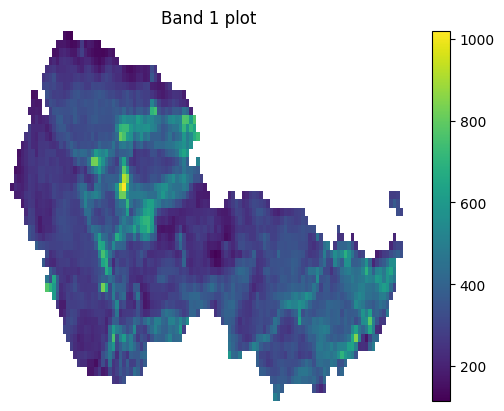

In [17]:
f, ax = plt.subplots()
landsat_post_xr_clip.plot(ax=ax)
ax.set_title("Band 1 plot")
ax.set_axis_off()
plt.show()

In [21]:
def open_clean_band(band_path, clip_extent, valid_range=None):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    clip_extent : geopandas geodataframe
        A geodataframe containing the clip extent of interest. NOTE: this will 
        fail if the clip extent is in a different CRS than the raster data.

    valid_range : tuple (optional)
        The min and max valid range for the data. All pixels with values outside
        of this range will be masked.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    try:
        clip_bound = clip_extent.geometry
    except Exception as err:
        print("Oops, I need a geodataframe object for this to work.")
        print(err)

    cleaned_band = rxr.open_rasterio(band_path,masked=True).rio.clip(clip_bound,from_disk=True).squeeze()

    if valid_range:
        mask = ((landsat_post_xr_clip < valid_range[0]) | (
            landsat_post_xr_clip > valid_range[1]))
        cleaned_band = landsat_post_xr_clip.where(
            ~xr.where(mask, True, False)) 
        
        return cleaned_band



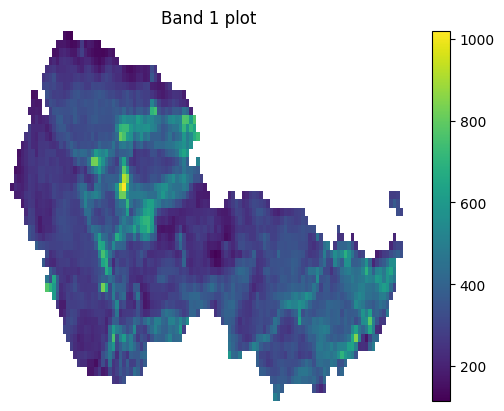

In [22]:
f, ax = plt.subplots()
cleaned_band.plot(ax=ax)
ax.set_title("Band 1 plot")
ax.set_axis_off()
plt.show()

In [23]:
fire_boundary_path = os.path.join("cold-springs-fire","vector_layers","fire-boundary-geomac","co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

In [24]:
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path,"*band[2-5]*.tif"))
all_landsat_post_bands.sort()
all_landsat_post_bands

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif']

In [25]:
landsat_crs = es.crs_check(all_landsat_post_bands[0])

fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)

In [35]:
post_all_bands = []
for i, aband in enumerate(all_landsat_post_bands):
    cleaned = open_clean_band(aband, fire_boundary_utmz13)
    

In [37]:
cleaned["band"] = i+1
post_all_bands.append(cleaned)

TypeError: 'NoneType' object does not support item assignment